<img src="figures/nn.gif" alt="nn" style="width: 1000px;"/>

# Deep learning is taking off today for 3 main reasons:

* Data
* Computation


### 1. Data 

The best thing to answer this question would be to show and explain you the picture below. 

<div class="item">
    <img src="figures/why_dl.png" alt="why_dl" width="1800px"/>
</div>


Large Neural Networks (e.g. Deep Learning) are getting better and better the more data you put into them.

* For a *small amount of data*, Neural Networks can perform as Linear regression or SVM (Support vector machine)
* For a *big amount of data*, a small Neural Network is better than SVM.
* For a *big amount of data*, a deeper Neural Network is better that a medium Neural Network, which is better than a small NN.
* Over the last decade, the world is generating a huge amount of data
    * Mobiles
    * IOT (Internet of things)
    * ...
    
### 2. Computation

The last decade has seen the emergence of

* GPUs and TPUs.
* Powerful CPUs.
* Distributed computing.


# 2. The Neural Network

## Biological Neuron


<div class="item">
    <img src="figures/biological_neuron.jpg" alt="biological_neuron" width="600px"/>
</div>


## The Perceptron


The perceptron algorithm takes a series of numbers as inputs and runs them through a set of corresponding numerical weights, and an activation function determines if the threshold has been reached and to give the non linearity to outputs.

The diagram below gives a better picture of how the perceptron actually worked.

<img src="figures/perceptron.png" alt="perceptron" width="600px" style="margin:10px 100px"/>


## A Single Neuron

The basic unit of computation in a neural network is the neuron, often called a node or unit. It receives input from some other nodes, or from an external source and computes an output.

<div class="item">
    <img src="figures/neuron.png" alt="neuron" width="600px"/>
</div>

The above network takes numerical inputs $x_1$ and $x_2$ and has weights $w_1$ and $w_2$ associated with those inputs. Additionally, there is another input 1 with weight b (called the Bias) associated with it. 

The function $f$ is usually non-linear and is called the **Activation Function**. The purpose of the activation function is to introduce non-linearity into the output of a neuron.

### A Single Neuron: Linear Regression

If the linear function is $f(x)=x$ and $n$ is the number of features then,

$$
\Large \hat{y} = \sum_{i=1}^n x_i w_i + b
$$

Hence, $\hat{y} = \sum_{i=1}^n x_i w_i + b$ generally represents a hyperplane which is used in **linear regression.**


### A Single Neuron: Logistic Regression

If the non-linear activation function $g(z) = \dfrac{1}{1 + e^{-z}}$ is applied to the dot product of the features and weights, then it is simply a linear regressor.

If the sigmoid function is $g(z) = \dfrac{1}{1 + e^{-z}}$ and $n$ is the number of features then,


\begin{align*} 
& z = \sum_{i=1}^n x_i w_i + b \newline 
& g(z) = \dfrac{1}{1 + e^{-z}} \newline 
& \hat{y} = g ( \sum_{i=1}^n x_i w_i + b ) 
\end{align*}

Hence, $\hat{y}$ generally represents a hyperplane which is used in **logistic regression.**

In [1]:
import numpy as np
import os
import tensorflow as tf
import sklearn
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

# loading iris data 
iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(int)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [3]:
y_pred

array([1])

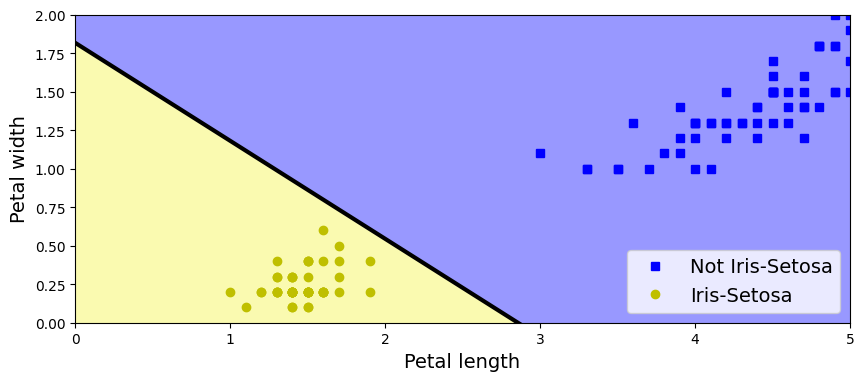

In [4]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

plt.show()

### We can deduce that the single perciptron can act as logistic regression

# Multi-Layer Perceptron

### Although the perceptron suffered from a couple of big problems. 
- using a weighted sum of the inputs is a form of a linear equation. Linear equations are a type of function that output a line:

<img src="figures/linear_classifier.png" alt="linear_classifier" style="width: 600px;"/>

- XOR Problem:

<img src="figures/xor.svg" alt="xor" style="width: 500px;"/>

it was possible to solve XOR with a perceptron using multiple layers of inputs and weights. Such a multilayer perceptron (MLP) would contain an input layer, one or more intermediate hidden layers, and an output layer.

<img src="figures/mlp.png" alt="mlp" style="width: 800px;"/>

In [5]:
from sklearn.datasets import load_iris
from tensorflow.keras import models, layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# loading iris data 
iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(int)
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Sequential API

In [6]:
model = models.Sequential()
model.add(layers.Dense(300, input_shape=(2,)))
model.add(layers.Dense(2, activation="softmax"))

```python
model = models.Sequential([
                            layers.Dense(300, input_shape=(2,)),
                            layers.Dense(1, activation="softmax")
                        ])

```

```python
tf.keras.backend.clear_session()
```

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               900       
                                                                 
 dense_1 (Dense)             (None, 2)                 602       
                                                                 
Total params: 1,502
Trainable params: 1,502
Non-trainable params: 0
_________________________________________________________________


In [8]:
# acess layer by index
hidden1 = model.layers[1]
hidden1.name
# acess weights 
weights, biases = hidden1.get_weights()

In [9]:
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

```python
model.compile(
              loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

In [10]:
history = model.fit(X_train, y_train, validation_data =  [X_test, y_test] , batch_size=12, epochs=100)

Epoch 1/100


10/10 [==============================] - 2s 56ms/step - loss: 0.4833 - accuracy: 0.6667 - val_loss: 0.4264 - val_accuracy: 0.6667
Epoch 2/100
10/10 [==============================] - 0s 9ms/step - loss: 0.4222 - accuracy: 0.6667 - val_loss: 0.4100 - val_accuracy: 0.6667
Epoch 3/100
10/10 [==============================] - 0s 9ms/step - loss: 0.4060 - accuracy: 0.6667 - val_loss: 0.3955 - val_accuracy: 0.6667
Epoch 4/100
10/10 [==============================] - 0s 9ms/step - loss: 0.3916 - accuracy: 0.6667 - val_loss: 0.3817 - val_accuracy: 0.6667
Epoch 5/100
10/10 [==============================] - 0s 9ms/step - loss: 0.3799 - accuracy: 0.6667 - val_loss: 0.3679 - val_accuracy: 0.6667
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 0.3655 - accuracy: 0.6667 - val_loss: 0.3562 - val_accuracy: 0.6667
Epoch 7/100
10/10 [==============================] - 0s 7ms/step - loss: 0.3541 - accuracy: 0.6667 - val_loss: 0.3445 - val_accuracy: 0.6667
Epoch 8/100
10/10 [=====

In [11]:
# making predictions
np.argmax(model.predict(X), axis = 1)

5/5 [==============================] - 0s 3ms/step


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

### play with activation ,optmizer and number of units

# Activation Functions

- Activation functions **add non-linearity** to the output which enables neural networks to solve non-linear problems.  In other words, a neural network without an activation function is essentially just a linear regression model. 

The Activation Functions can be basically divided into 2 types
- Linear Activation Functions
- Non-linear Activation Functions

## Linear Activation Functions

As you can see the function is a line or linear. Therefore, the output of the functions will not be confined between any range.

<img src="figures/linear_activation_function.png" alt="linear_activation_function" style="width: 300px;"/>


* Equation : $f(x) = x$
* Range : (-infinity to infinity)

It doesn’t help with the complexity or various parameters of usual data that is fed to the neural networks.


## Non-linear Activation Functions

- The Nonlinear Activation Functions are the most used activation functions. 
- Nonlinearity helps makes your neural network captures non linear relationships as we can see in the figure below. 
- It makes it easy for the model to generalize or adapt with variety of data and to differentiate between the output.

<img src="figures/non_linearity.png" alt="non_linearity" style="width: 400px;"/>


The Nonlinear Activation Functions are mainly divided on the basis of their **range or curves**.

<img src="figures/activation_functions.png" alt="activation_functions" style="width: 700px;"/>


### Sigmoid or Logistic Activation Function

The sigmoid function is defined as follows:

$$g(z) = \dfrac{1}{1 + e^{-z}}$$

- It translates the input ranged in [-Inf; +Inf] to the range in (0; 1). 
- The main reason why we use sigmoid function is because it exists between (0; 1). 

Therefore, it is especially used for models where we have to predict the probability as an output. Since probability of anything exists only between the range of 0 and 1, sigmoid is the right choice.

- The function is differentiable. That means, we can find the slope of the sigmoid curve at any two points.

**Problems With Sigmoid Function**

* The exp( ) function is computationally expensive.
* The problem of vanishing gradients. The logistic sigmoid function can cause a neural network to get stuck at the training time.

### Tanh or hyperbolic tangent Activation Function

The tanh function is defined as follows:

$$h(z) = \dfrac{e^{z} - e^{-z}}{e^{z} + e^{-z}}$$


- The range of the tanh function is from (-1 to 1).

**Problems With Tanh Function**

* Like sigmoid, tanh also has a vanishing gradient problem.

### ReLU (Rectified Linear Unit) Activation Function

- The ReLU is the most used activation function in the world right now. 
- ReLU is linear (identity) for all positive values, and zero for all negative values

**Benefits of ReLU** 

- Cheap to compute as there is no complicated math and hence easier to optimize.
- It converges faster. It accelerates the convergence of SGD compared to sigmoid and tanh (around 6 times).
- It does not have a vanishing gradient problem like tanh or sigmoid function.
- It is capable of outputting a true zero value allowing the activation of hidden layers in neural networks to contain one or more true zero values called Representational Sparsity.

**Problems with ReLU**

* The downside for being zero for all negative values called dying ReLU. So if once neuron gets negative it is unlikely for it to recover. This is called “dying ReLU” problem.
* If the learning rate is too high the weights may change to a value that causes the neuron to not get updated at any data point again.

### Leaky ReLU


$${\displaystyle f(x)={\begin{cases}x&{\text{if }}x>0,\\0.01x&{\text{otherwise}}.\end{cases}}}$$



### Parametric ReLU (PReLU)


$${\displaystyle f(x)={\begin{cases}x&{\text{if }}x>0,\\ax&{\text{otherwise}}.\end{cases}}}$$

### Exponential Linear Unit (ELU)



$${\displaystyle f(x)={\begin{cases}x&{\text{if }}x>0,\\a(e^{x}-1)&{\text{otherwise}},\end{cases}}}$$

where ${\displaystyle a}$ is a hyper-parameter to be tuned, and ${\displaystyle a\geq 0}$ is a constraint.


In [12]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

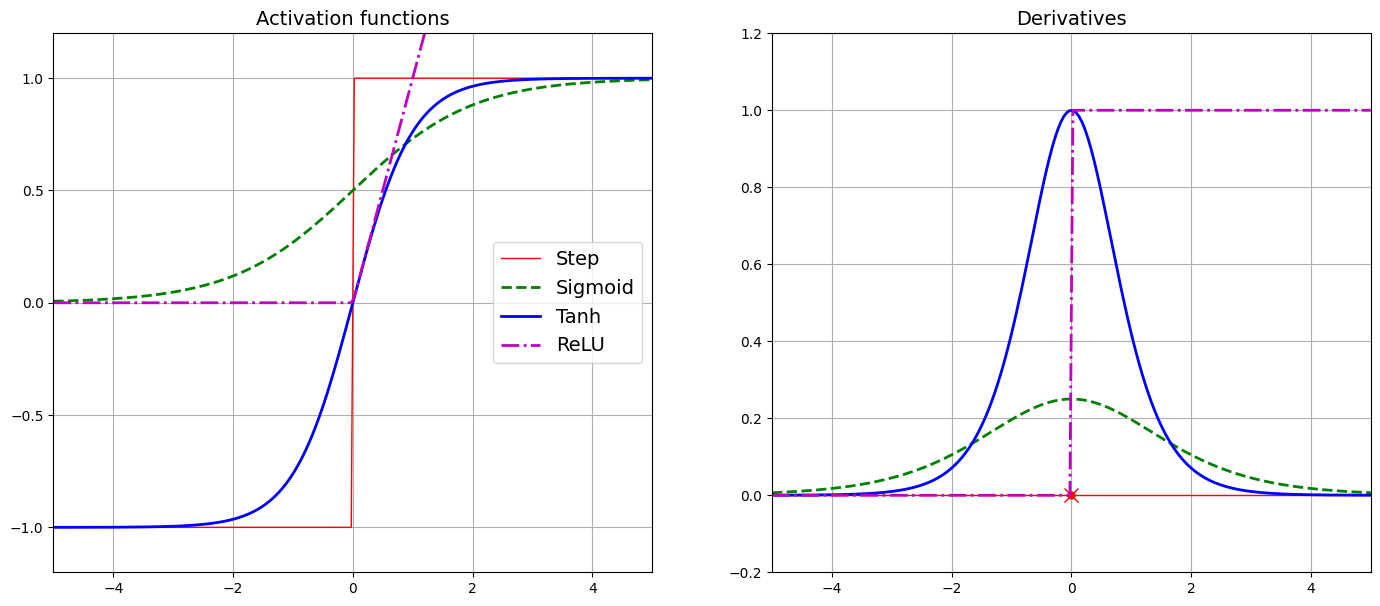

In [13]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(17,7))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

### We can notice that in big input values Tanh and Sigmoid Saturate *derivative = 0*

# Model tuning

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import pandas as pd


X_moon, y_moon = make_moons(n_samples=1000, noise=0.30, random_state=42)
y_moon = encoder.fit_transform(y_moon.reshape(-1, 1))
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_moon, y_moon, random_state=42)

In [15]:
def tune_model(X_train_m = X_train_m, X_test_m = X_test_m, y_train_m = y_train_m, y_test_m= y_test_m,
               dense_layers = 1,dense_units =100 , activation_t = 'relu', batch=12):
    
    model = models.Sequential()
    model.add(layers.Dense(dense_units, input_shape=(2,), activation=activation_t))

    for _ in range(dense_layers):
        model.add(layers.Dense(dense_units, activation= activation_t ))
    
    model.add(layers.Dense(2, activation="softmax"))

    model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
    
    history = model.fit(X_train_m, y_train_m, validation_data =  [X_test_m, y_test_m] , batch_size=batch, epochs=100, verbose=0)
    return history, model

In [16]:
def plot_moon(model, X_moon= X_moon, y_moon = y_moon):
    '''
    plotting the reults of dnn model with moon dataset 
    '''
    X = X_moon
    y = np.argmax(y_moon , axis = 1)
    axes = [0, 5, 0, 2]

    x0, x1 = np.meshgrid(
            np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
            np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
        )

    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = np.argmax(model.predict(X_new), axis = 1)
    zz = y_predict.reshape(x0.shape)

    #plt.figure(figsize=(10, 4))
    plt.plot(X[y==0, 0], X[y==0, 1], "bs")
    plt.plot(X[y==1, 0], X[y==1, 1], "yo")

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

    plt.contourf(x0, x1, zz, cmap=custom_cmap)
    plt.xlabel("Petal length", fontsize=14)
    plt.ylabel("Petal width", fontsize=14)
    plt.axis(axes)

3125/3125 [==============================] - 6s 2ms/step


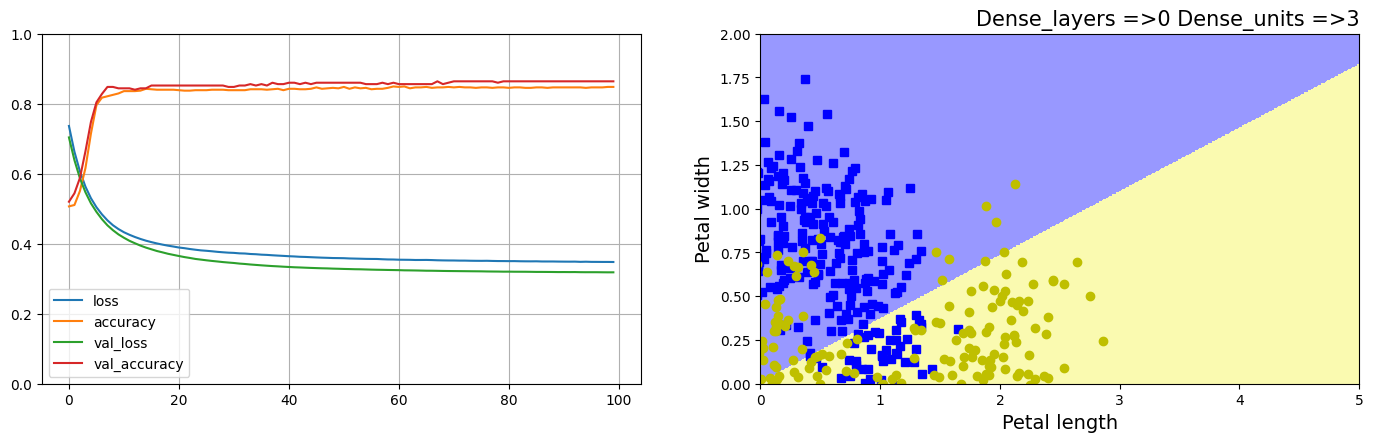

3125/3125 [==============================] - 6s 2ms/step


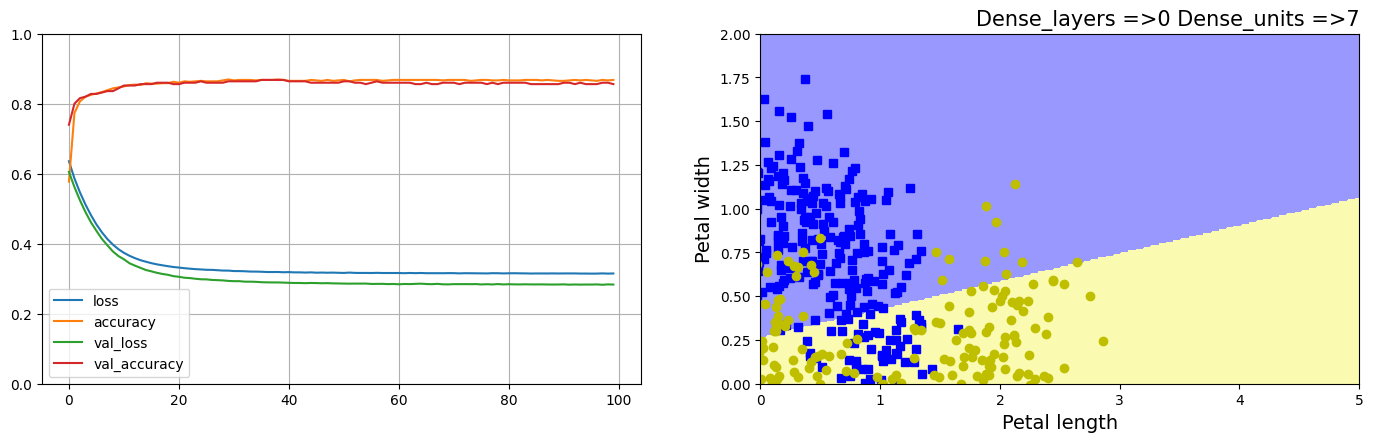

3125/3125 [==============================] - 6s 2ms/step


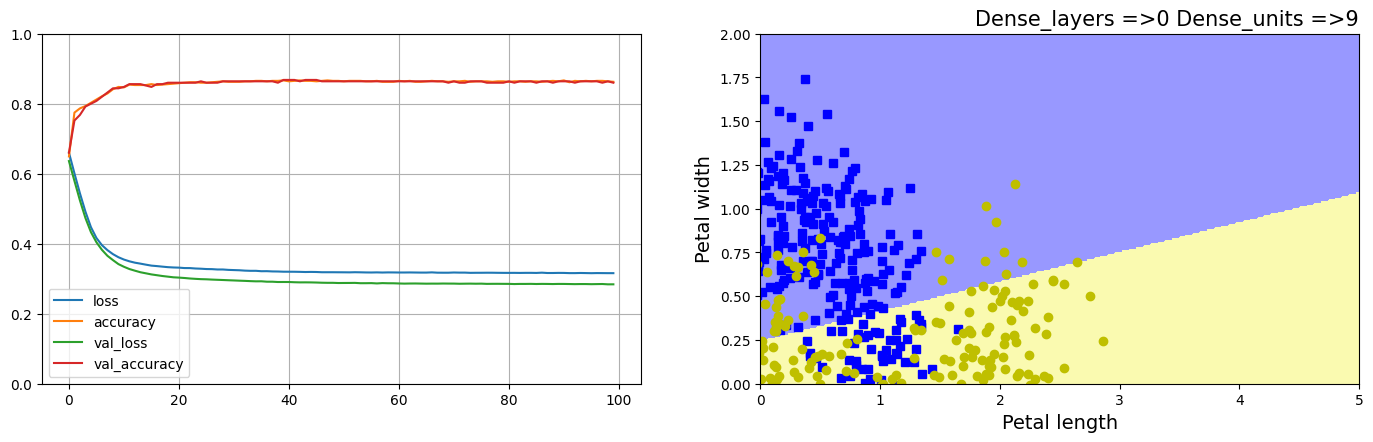

3125/3125 [==============================] - 7s 2ms/step


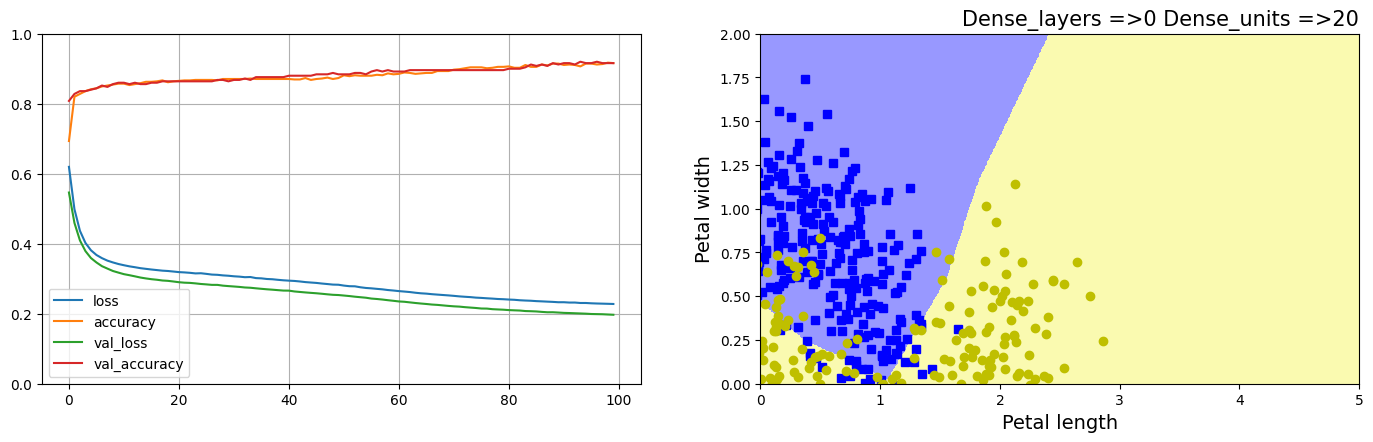

3125/3125 [==============================] - 8s 2ms/step


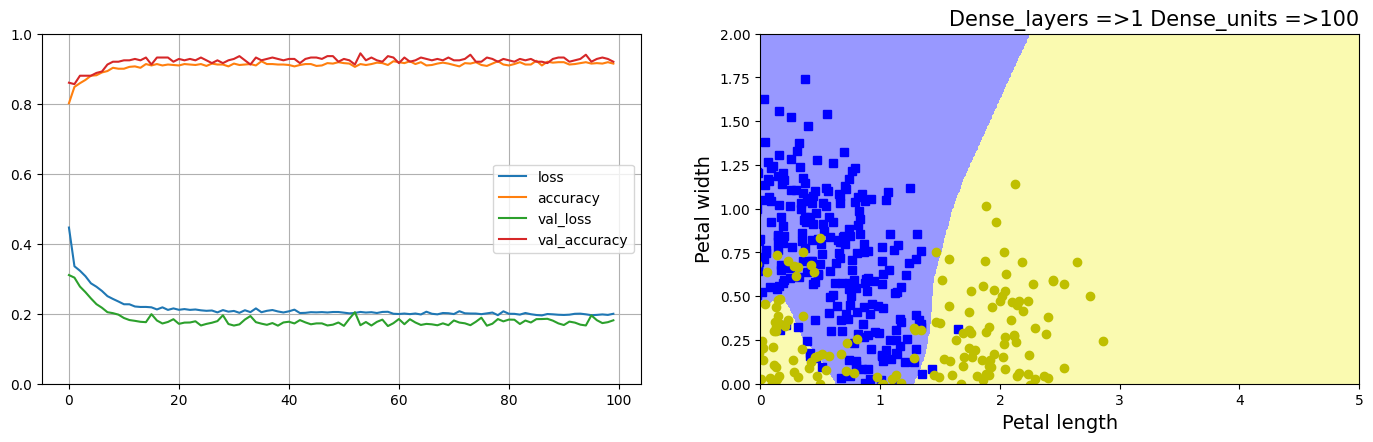

3125/3125 [==============================] - 12s 4ms/step


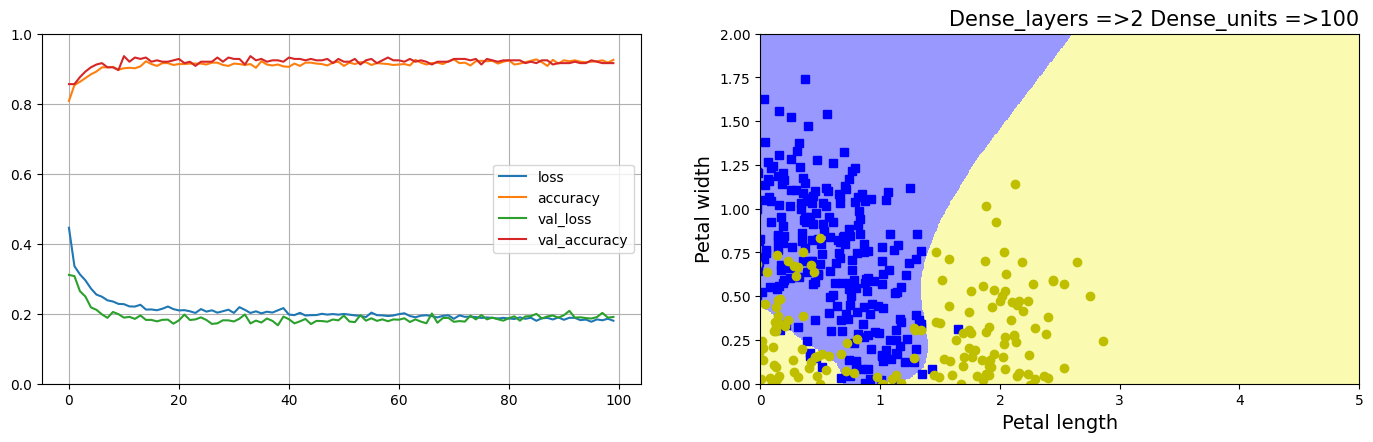

3125/3125 [==============================] - 8s 3ms/step


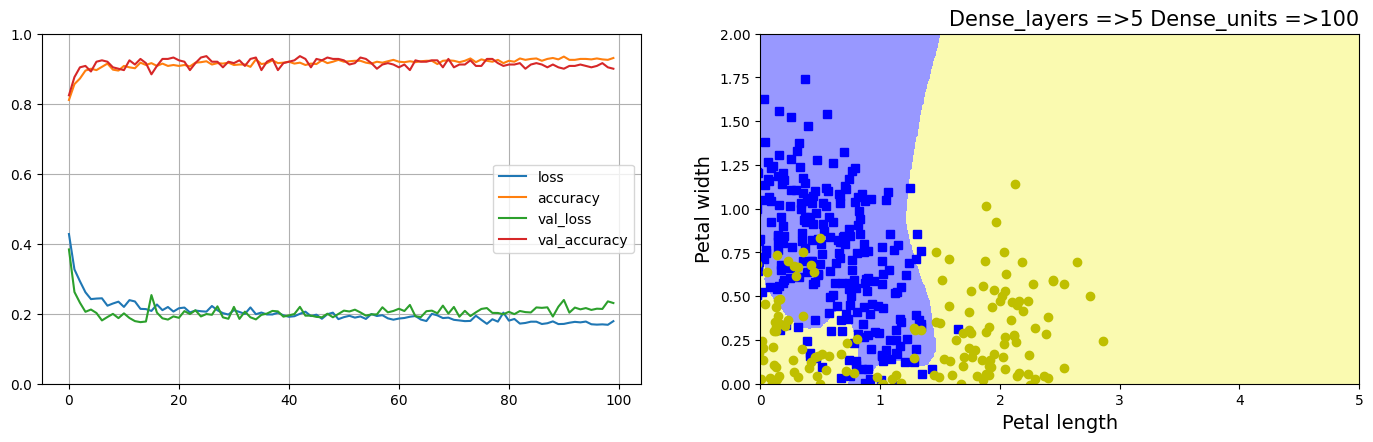

3125/3125 [==============================] - 10s 3ms/step


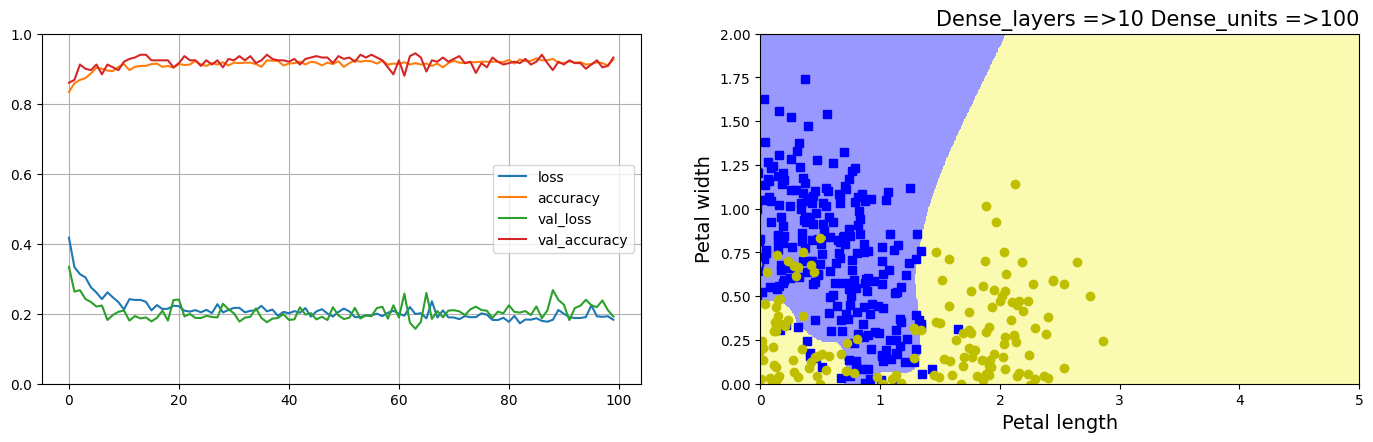

3125/3125 [==============================] - 17s 5ms/step


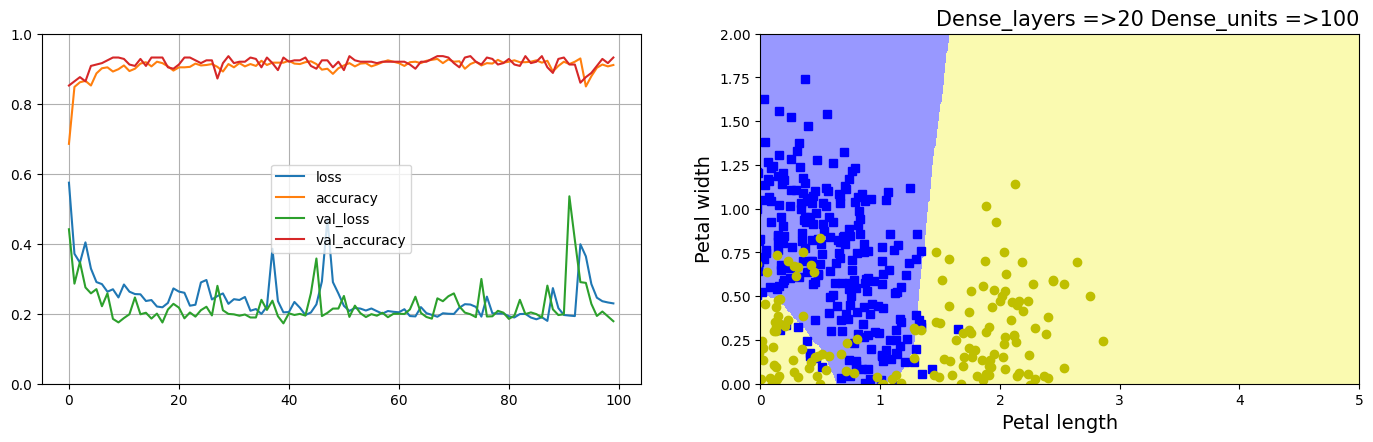

In [17]:
for i in range(9):
    plt.figure(figsize=(17,10))

    dense_layers = [0, 0, 0, 0, 1, 2 , 5, 10, 20]
    dense_units =  [3, 7, 9, 20, 100, 100, 100, 100, 100]
    history, model = tune_model(
               dense_layers = dense_layers[i],
               dense_units =dense_units[i] , activation_t = 'relu', batch=12)

    plt.subplot(2,2,  1)
    plt.plot(pd.DataFrame(history.history), label= history.history.keys())
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.legend()

    plt.subplot(2,2, 2)
    plot_moon(model)
    plt.title(f'Dense_layers =>{dense_layers[i]} Dense_units =>{dense_units[i]}', loc='right', fontsize = 15)
    tf.keras.backend.clear_session()
    plt.show()

3125/3125 [==============================] - 7s 2ms/step


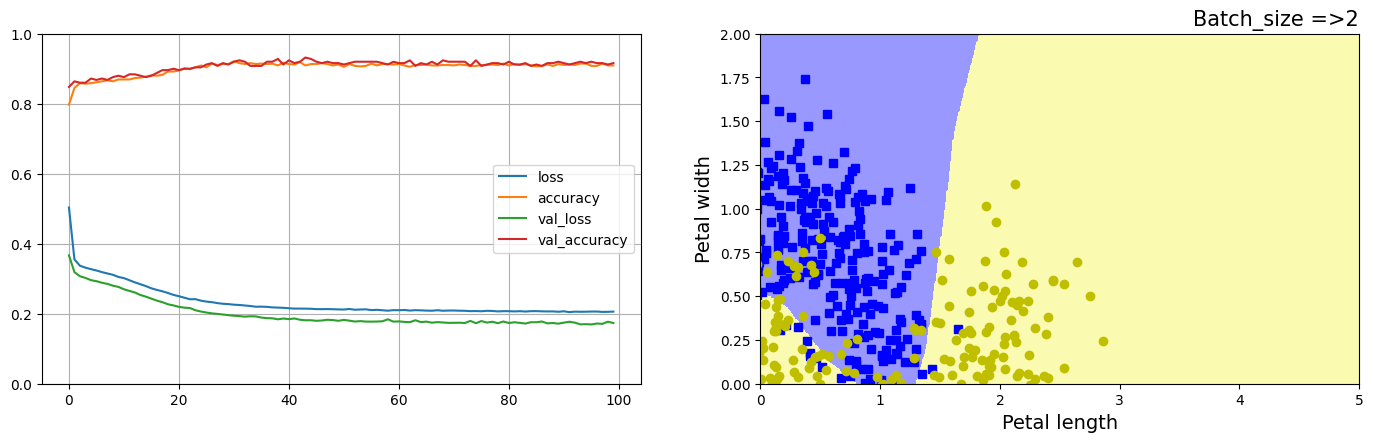

3125/3125 [==============================] - 9s 3ms/step


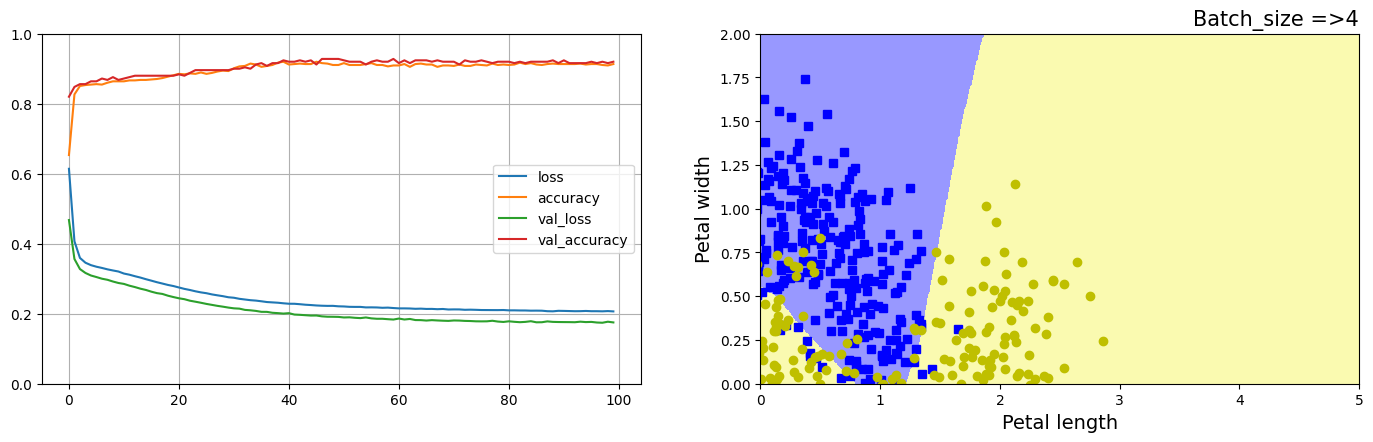

3125/3125 [==============================] - 5s 2ms/step


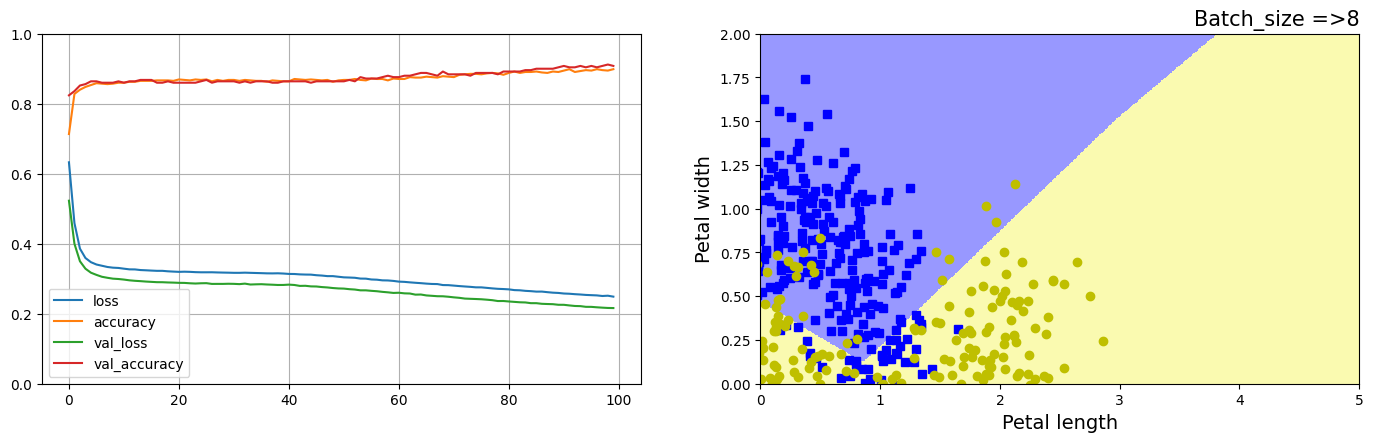

3125/3125 [==============================] - 8s 3ms/step


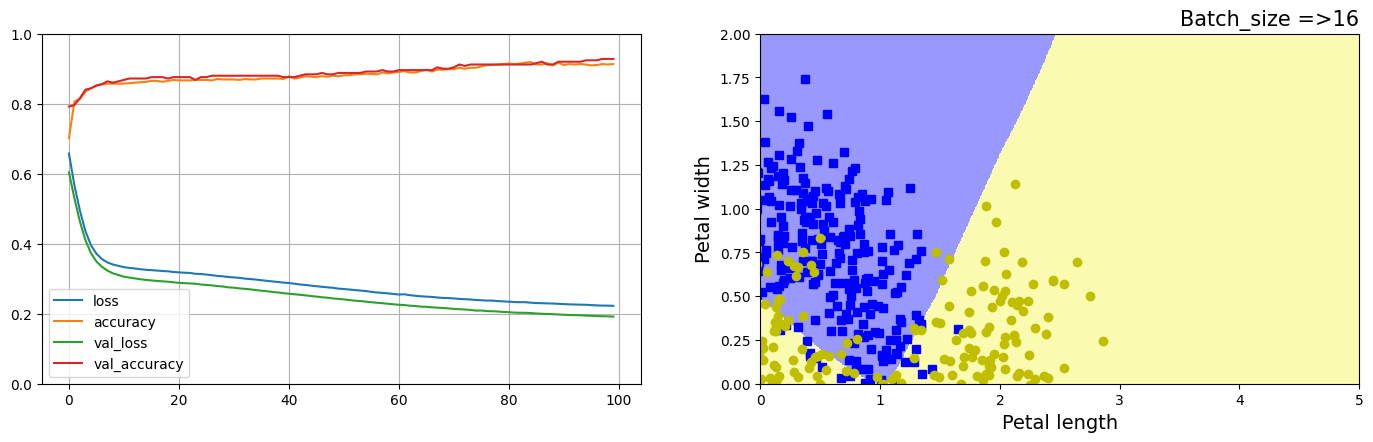

3125/3125 [==============================] - 7s 2ms/step


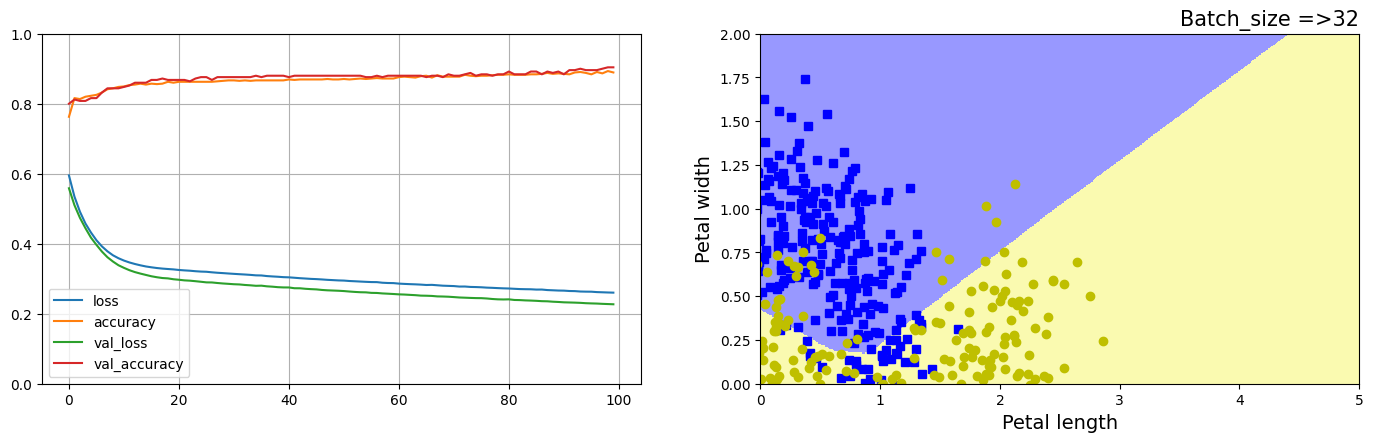

3125/3125 [==============================] - 7s 2ms/step


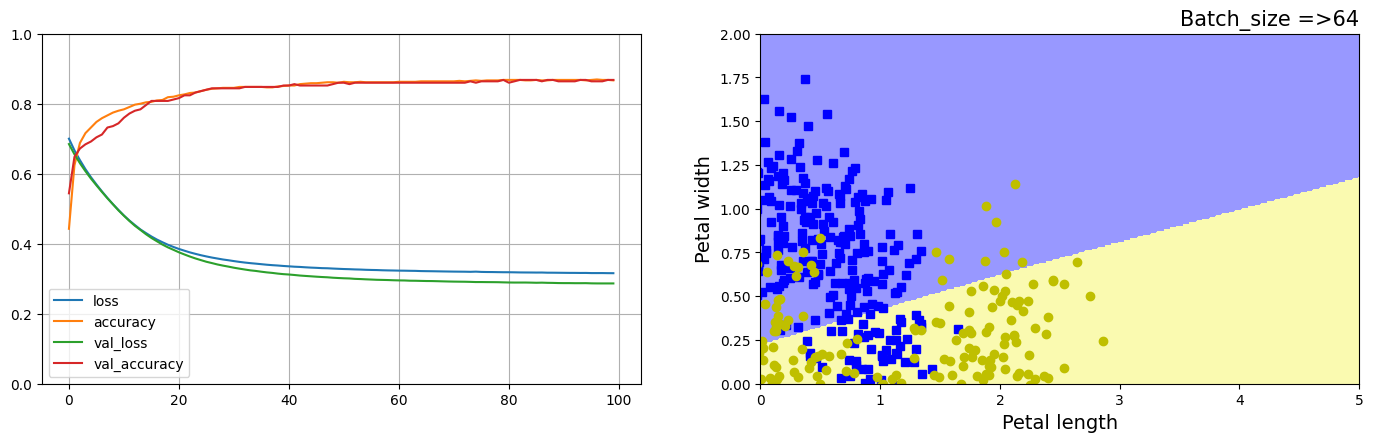

3125/3125 [==============================] - 6s 2ms/step


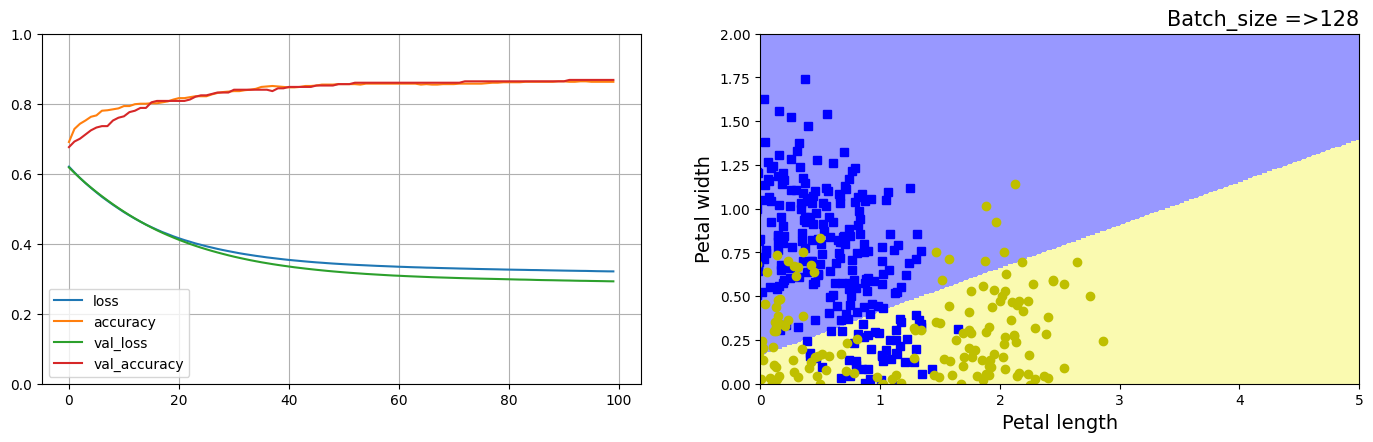

In [18]:
for i in range(7):
    plt.figure(figsize=(17,10))

    batch = [2, 4, 8, 16, 32, 64 ,128 ]

    history, model = tune_model( dense_layers = 0 ,dense_units = 20, activation_t = 'relu', batch=batch[i])

    plt.subplot(2,2,  1)
    plt.plot(pd.DataFrame(history.history), label= history.history.keys())
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.legend()

    plt.subplot(2,2, 2)
    plot_moon(model)
    plt.title(f'Batch_size =>{batch[i]}', loc='right', fontsize = 15)
    tf.keras.backend.clear_session()
    plt.show()

### Functional API

In [ ]:
# deep wide network
input_A = layers.Input(shape=[5], name="wide_input")
input_B = layers.Input(shape=[6], name="deep_input")
hidden1 = layers.Dense(30, activation="relu")(input_B)
hidden2 = layers.Dense(30, activation="relu")(hidden1)
concat = layers.concatenate([input_A, hidden2])
output = layers.Dense(1, name="output")(concat)
model = models.Model(inputs=[input_A, input_B], outputs=[output])

### multi output model
```python
    input_A = keras.layers.Input(shape=[5], name="wide_input")
    input_B = keras.layers.Input(shape=[6], name="deep_input")
    hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
    hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
    concat = keras.layers.concatenate([input_A, hidden2])
    output = keras.layers.Dense(1, name="main_output")(concat)
    aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
    model = keras.models.Model(inputs=[input_A, input_B],
                            outputs=[output, aux_output])
```

### Saving and Restoring

In [ ]:
# saving model
model.save("my_keras_model.h5")
model = models.load_model("my_keras_model.h5")

In [ ]:
# saving weights
model.save_weights("my_keras_weights.ckpt")
model.load_weights("my_keras_weights.ckpt")

### Using Callbacks during Training

In [ ]:
model.compile(loss="mse", optimizer=tf.jeras.optimizers.SGD(learning_rate=1e-3))
# saving the best weights model
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

history = model.fit(X_train, y_train, epochs=10,
                    callbacks=[checkpoint_cb])

model = tf.keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

In [ ]:
# early stoppiong callback
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    callbacks=[checkpoint_cb, early_stopping_cb])

In [ ]:
# costum callbacks
class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    callbacks=[val_train_ratio_cb])


In [ ]:
# exponentially decaying learning rate
K = tf.keras.backend

class ExponentialLearningRate(tf.keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []

    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)
